In [ ]:
"""
1. 문제 정의
  - 1970년 중반 보스턴 외각 지역에 대한 여러 feature를 통해 주택 가격의 중간 값을 예측하는 문제.
2. 데이터 확보
  - keras boston_housing dataset을 사용합니다.
3. 데이터 특징 추출
4. 데이터 전처리
5. 모델 비교
6. 모델 준비
7. 모델 학습
8. 모델 평가
9. 모델 튜닝
10. 모델 서빙

colab : https://colab.research.google.com/drive/1JvxrPnxWCKw6CtXrWUgRu9dUeJcW-GAx?usp=sharing
"""

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape

(404, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
# 데이터 준비 (정규화)
# 각 특성은 스케일이 서로 다르다. 어떤 값은 0과 1사이, 어떤 값은 1과 12사이 값을 가진다.
# 테스트 데이터에서 계산한 어떠한 값도 사용하면 안 된다.
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
# 모델 준비
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
          layers.Dense(64, activation = "relu"),
          layers.Dense(64, activation = "relu"),
          layers.Dense(1)
  ])
  model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return model

In [9]:
# k-겹 검증을 사용한 훈련 검증
import numpy as np

k = 4
num_val = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print("처리중인 폴드 #", i)
  val_data = train_data[i * num_val : (i+1) * num_val]
  val_targets = train_targets[i * num_val : (i+1) * num_val]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val],
       train_data[(i+1) * num_val:]],
       axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val],
       train_targets[(i+1) * num_val:]],
       axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)
all_scores

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


[2.073972225189209, 2.6602847576141357, 2.583601236343384, 2.3743913173675537]

In [13]:
# 각 폴드의 검증 점수 저장
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing fold #", i + 1)
    val_data = train_data[i * num_val:(i + 1) * num_val]
    val_targets = train_targets[i * num_val:(i + 1) * num_val]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val],
         train_data[(i + 1) * num_val:]],
        axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val],
         train_targets[(i + 1) * num_val:]],
        axis=0
    )

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,
                        verbose=0)

    all_mae_histories.append(history.history["val_mae"])

Processing fold # 1
Processing fold # 2
Processing fold # 3
Processing fold # 4


In [14]:
# 평균 기록하기
average_mae_history = [
    np.mean([ x[i] for x in all_mae_histories ]) for i in range(num_epochs)
]

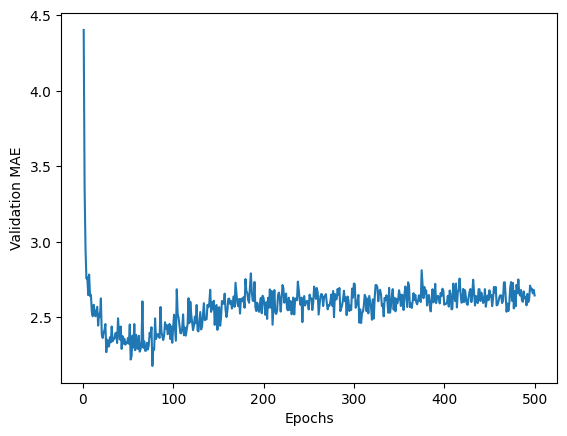

In [17]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

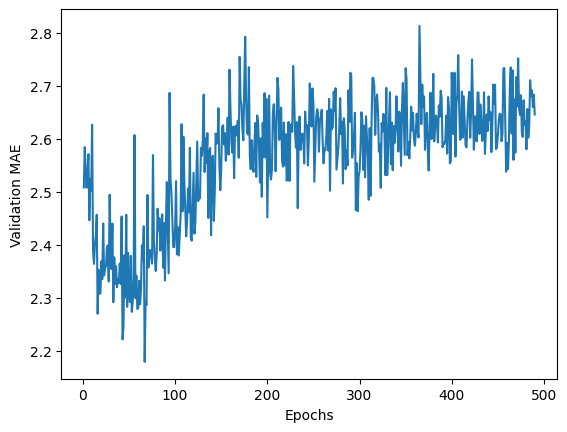

In [18]:
# 처음 10개의 데이터 포인트 제외한 검증 그래프 시각화
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

In [19]:
# 모델 훈련
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

In [20]:
test_mse_score, test_mae = model.evaluate(test_data, test_targets)
test_mse_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7719 - mae: 2.3395 


16.831884384155273

In [22]:
# 새로운 데이터 예측
predictions = model.predict(test_data)
predictions[0] # 약 8천 달러로 예측

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([7.98523], dtype=float32)